![](https://media.giphy.com/media/xT5LMu62JyVsGFfUbu/giphy.gif)


In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
!pip install joypy

In [3]:
!pip install bubbly

In [4]:
import numpy as np
import pandas as pd
import joypy 
import gc

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
from pandas.plotting import parallel_coordinates

# For interactive visualizations
import plotly
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.express as px
from plotly import tools
import plotly.figure_factory as ff
import plotly.graph_objects as go

# For animation visualization
from bubbly.bubbly import bubbleplot

import warnings
warnings.filterwarnings('ignore')

## Load Dataframe

In [5]:
linkwhite='https://drive.google.com/open?id=1FWESimZDPnc4ZmBZRFIaAjr8j6yuOK0e'
fluff, id2 = linkwhite.split('=')
print (id2)

downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('insurance.csv')  
dataset = pd.read_csv('insurance.csv')
dataset.head()

1FWESimZDPnc4ZmBZRFIaAjr8j6yuOK0e


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [6]:
data = dataset.copy()

In [7]:
# Create a new column with year of 'months_as_customer'
data['years_as_customer'] = data['months_as_customer'].div(12)
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,years_as_customer
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,27.333333
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,19.000000
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,11.166667
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,21.333333
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,19.000000


In [8]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'years_as_customer'],
      dtype='object')

In [9]:
# Dataframe shape
print('Rows    :', data.shape[0])
print('Columns :', data.shape[1])

Rows    : 1000
Columns : 40


### Describing data
Statistical summary for numeric data include things like the mean, min, and max of the data. Can be useful to get a feel for how large some of the variables are and what variables may be the most important

In [10]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,years_as_customer
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,16.996167
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,9.592765
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,9.645833
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,16.625000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,23.020833
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,39.916667


### Categorical data describe
Statistical summary for categorical or string variables will show “count”, “unique”, “top”, and “freq”

In [11]:
# Categorical variables
data.describe(include='O')

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,4,4,5,7,7,1000,3,3,14,39,2
top,8/5/1992,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,2/2/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,2352 Sky Drive,?,?,Suburu,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,292,354,292,262,157,1,360,343,80,43,753


In [12]:
# Missing values and Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [13]:
# Unique values
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [14]:
# Where data values are displayed as '?', replace with NaN values 
data = data.replace('?', np.NaN)
data.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [15]:
# Percentage of missing values in each column
missing_val = ((data.isna().sum()) / len(data.index)).sort_values(ascending=False)
missing_val = missing_val[missing_val > 0]
print(missing_val * 100)

property_damage            36.0
police_report_available    34.3
collision_type             17.8
dtype: float64


## Handle missing values



In [16]:
# No responses for 'property_damage', lets assume NO damage to property
data['property_damage'].fillna('NO', inplace=True)

# No responses for 'police_report_available', lets assume no report available
data['police_report_available'].fillna('NO', inplace=True)

# Replace '?' by the most common value for 'collision_type' 
data['collision_type'].fillna(data['collision_type'].mode()[0], inplace=True)

data.isnull().any().any()

False

### Handle Outliers

In [17]:
def handle_outliers(data, col_name, threshold_max, threshold_min=0, value_to_be_replaced = np.nan):
    '''
    Our function handles outliers in the dataframe 
    Any value that is greater than threshold_max or less than threshold_min is 
    considered an outlier
    All outliers will be replaced with value_to_be_replaced
    INPUTS:
    data - dataframe
    col_name - column name for which outliers need to be handled
    threshold_min - any value < will be considered an outlier
    threshold_max - any value > will be considered an outlier
    value_to_be_replaced - all outliers will be replaced by this value
    OUTPUT:
    data - dataframe after outliers are handled
    '''
    # Any value above or below threshold will be considered outliers
    is_outlier = (data[col_name] > threshold_max) | (data[col_name] < threshold_min)
    data_anomalous = data[is_outlier]
    num_of_outlier_rows = len(data_anomalous.index)
    
    if num_of_outlier_rows > 0:
        # Print unique outlier values
        outliers = data_anomalous[col_name].unique()
        print("List of unique outlier values in '{}' column, as found: {}".format(col_name, str(outliers)))
        
        # Replace all outlier values
        data.loc[is_outlier, col_name] = value_to_be_replaced
        print('Number of rows updated: ', str(num_of_outlier_rows))
    else:
        print("No outlier found for column '{}'.".format(col_name))
    
    del data_anomalous
    gc.collect()
    
    return data

In [18]:
def select_data_by_values(data, col_name, valid_values):
    '''
    Our function selects those rows where value under col_name 
    belongs to valid_values
    INPUTS:
    data - dataframe
    col_name - column name for which outliers need to be handled
    valid_values - list of valid values supported
    OUTPUT:
    data - dataframe after outliers are handled
    '''
    rows_before = len(data.index)
    data = data[data[col_name].isin(valid_values)]
    rows_after = len(data.index)
    
    # Print sound messages
    rows_filtered = rows_before - rows_after
    if rows_filtered > 0:
        print('Number of rows excluded: ', str(rows_filtered))
    else:
        print("No outlier found for column '{}'.".format(col_name))
    
    return data

In [19]:
max_tot_claim = 109000

In [20]:
var_col = handle_outliers(
    data, 'total_claim_amount', max_tot_claim
)

List of unique outlier values in 'total_claim_amount' column, as found: [114920 112320]
Number of rows updated:  2


## Visualize data

In [21]:
# Target variable
fraud = data['fraud_reported'].value_counts()

label_fraud = fraud.index
size_fraud = fraud.values

colors = ['silver', 'gold']
trace = go.Pie(
    labels=label_fraud, 
    values=size_fraud, 
    marker=dict(colors=colors), 
    name='Genuine Vs Fraud Claims', 
    hole=0.3
)

df = [trace]

layout = go.Layout(
    title='Fraud Vs Genuine Claims'
)

fig = go.Figure(data=df, layout=layout)
iplot(fig)

In [22]:
fig = go.Figure(data=go.Choropleth(
    locations=data['incident_state'], 
    z=data['total_claim_amount'].astype(float), 
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Claims USD',
))

fig.update_layout(
    title_text='US Insurance Fraud Risks by State',
    geo_scope='usa' 
)

fig.show()

In [23]:
df = px.data.tips()
fig = px.pie(
    data, 
    values='total_claim_amount', 
    names='incident_state',
    color_discrete_sequence=px.colors.sequential.RdBu, 
    title='Total Claims by State'
)

fig.show()

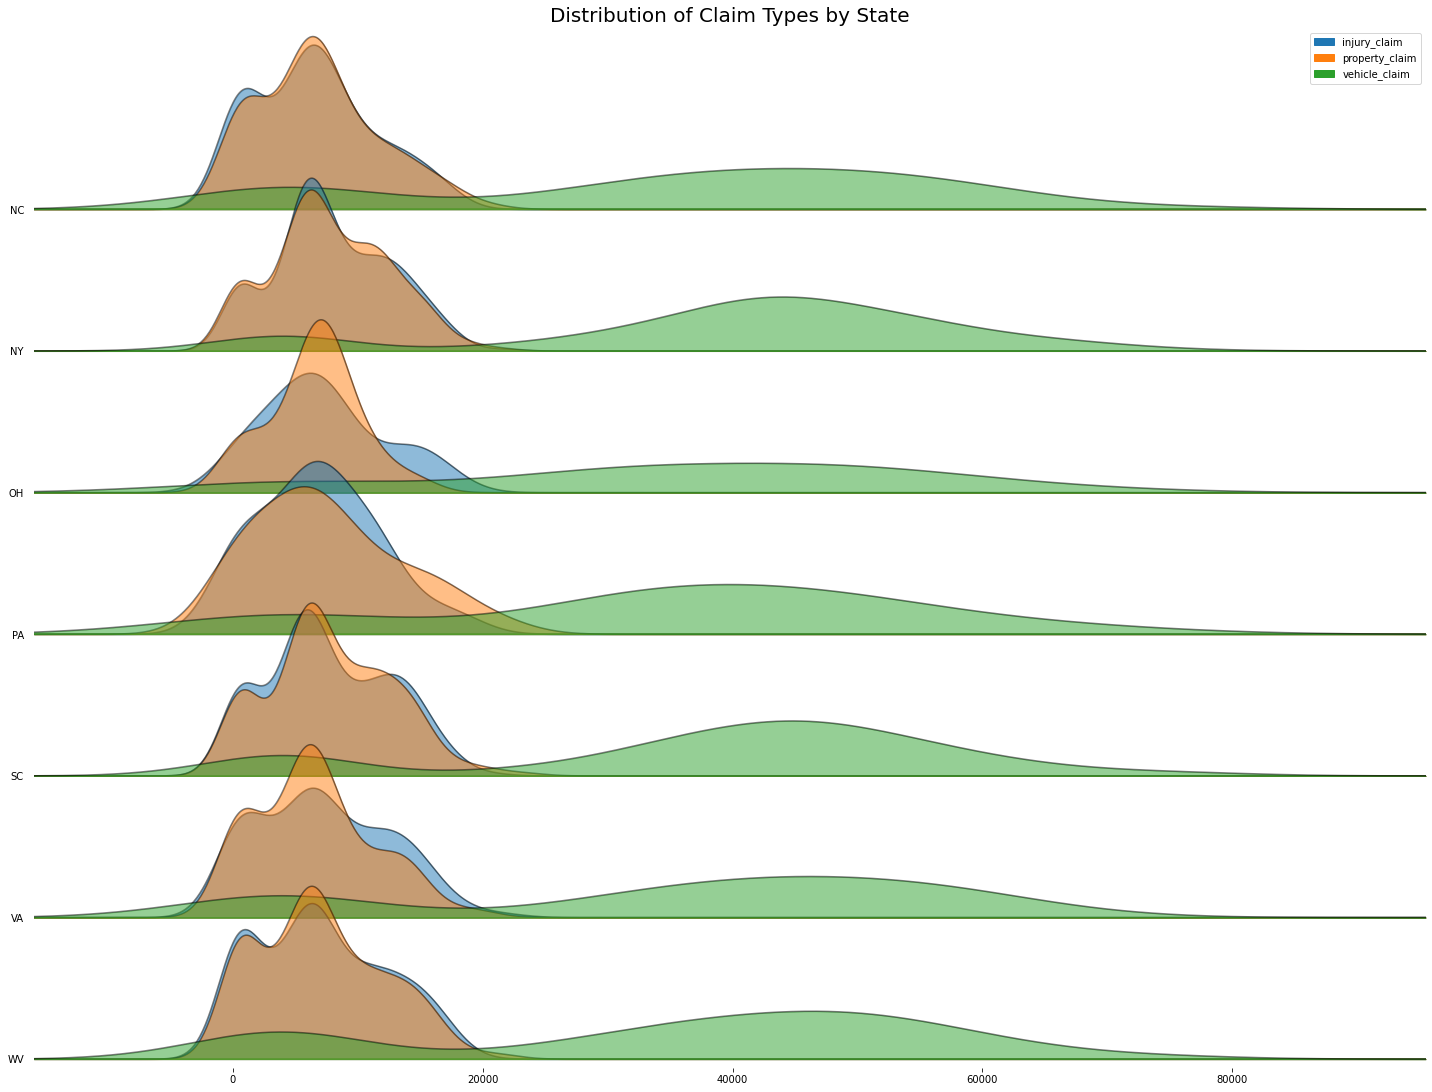

In [24]:
ffig, ax = joypy.joyplot(
    data,
    column=['injury_claim', 'property_claim', 'vehicle_claim'],
    by='incident_state',
    ylim='own',
    figsize=(20,15),
    alpha=0.5, 
    legend=True
)

plt.title('Distribution of Claim Types by State', fontsize=20)
plt.show()

#### Univariate Plotting

In [25]:
fig = px.histogram(
    data, 
    x='total_claim_amount',
    nbins=100,
    title='Distribution of Total Claims',
    color_discrete_sequence=['indianred']
)

fig.show()

In [26]:
trace = go.Histogram(
    x=data['policy_annual_premium'],
    marker=dict(color='greenyellow')
)

df = [trace]

layout = go.Layout(
    title='Distribution of Annual Premium amongst Customers',
)
    
fig = go.Figure(data=df, layout=layout)
iplot(fig)

In [27]:
fig = px.histogram(
    data, 
    x='years_as_customer',
    title='Distribution of Years of Customer Loyalty'
)

fig.show()

In [28]:
trace = go.Histogram(
    x=data['age'], 
    marker=dict(color='rgb(215, 245, 5, 0.5)')
)

df = [trace]

layout = go.Layout(
    title='Distribution of Age amongst Customers',
    scene=dict(xaxis=dict(title='Age (years)'),
               yaxis=dict(title='Count'))
)

fig = go.Figure(data=df, layout=layout)
iplot(fig)

In [29]:
x = ['injury_claim', 'property_claim', 'vehicle_claim']
y = [20, 14, 23]

fig = go.Figure(
    data=[go.Bar(x=x, y=y,
            hovertext=['27% market share', '24% market share', '19% market share'])])

fig.update_traces(
    marker_color='rgb(158,202,225)',
    marker_line_color='rgb(8,48,107)',
    marker_line_width=1.5, 
    opacity=0.6
)

fig.update_layout(title_text='Claims Report')
fig.show()

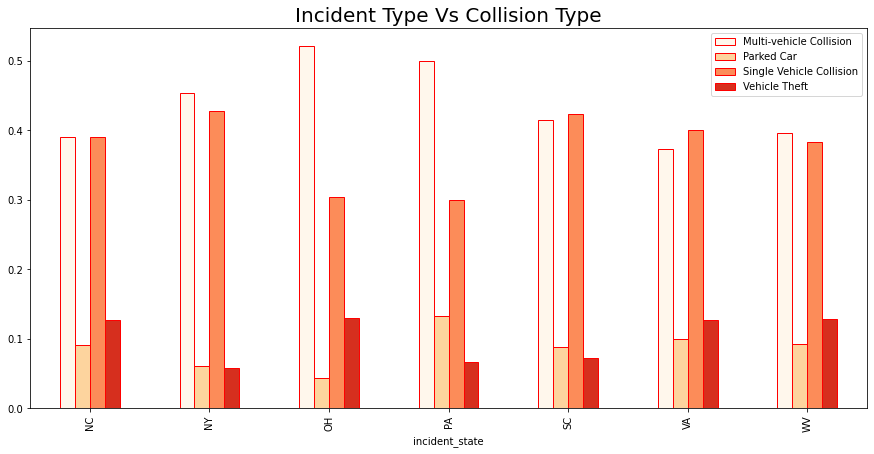

In [30]:
incident = pd.crosstab(data['incident_state'], data['incident_type'])
colors = plt.cm.OrRd(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), 
             axis=0).plot(kind='bar',
                          stacked=False,
                          figsize=(15,7),
                          color=colors, edgecolor='red')

plt.title('Incident Type Vs Collision Type', fontsize=20)
plt.legend()
plt.show()

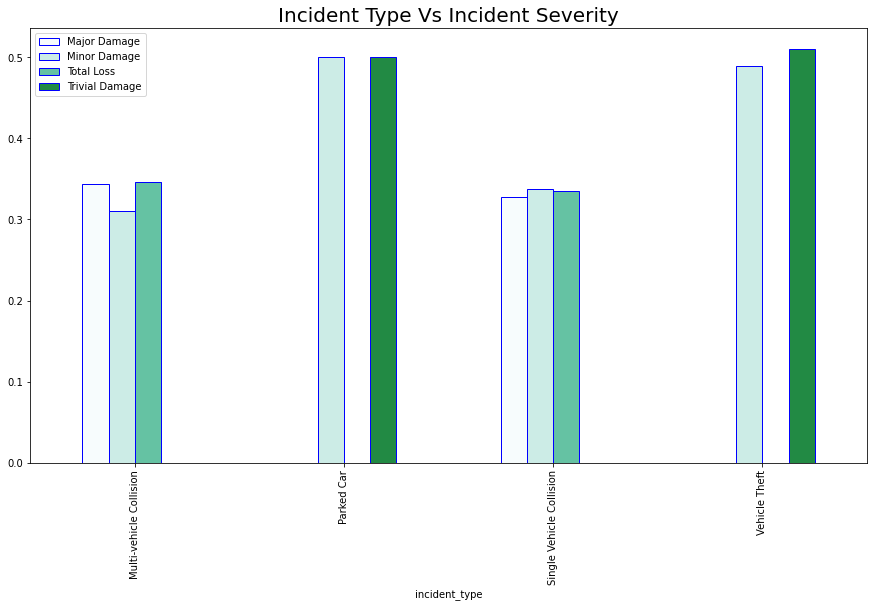

In [31]:
incident = pd.crosstab(data['incident_type'], data['incident_severity'])
colors = plt.cm.BuGn(np.linspace(0,1,5))
incident.div(incident.sum(1).astype(float), 
             axis=0).plot(kind='bar',
                          stacked=False,
                          figsize=(15,8),
                          color=colors, edgecolor='blue')

plt.title('Incident Type Vs Incident Severity', fontsize=20)
plt.legend()
plt.show()

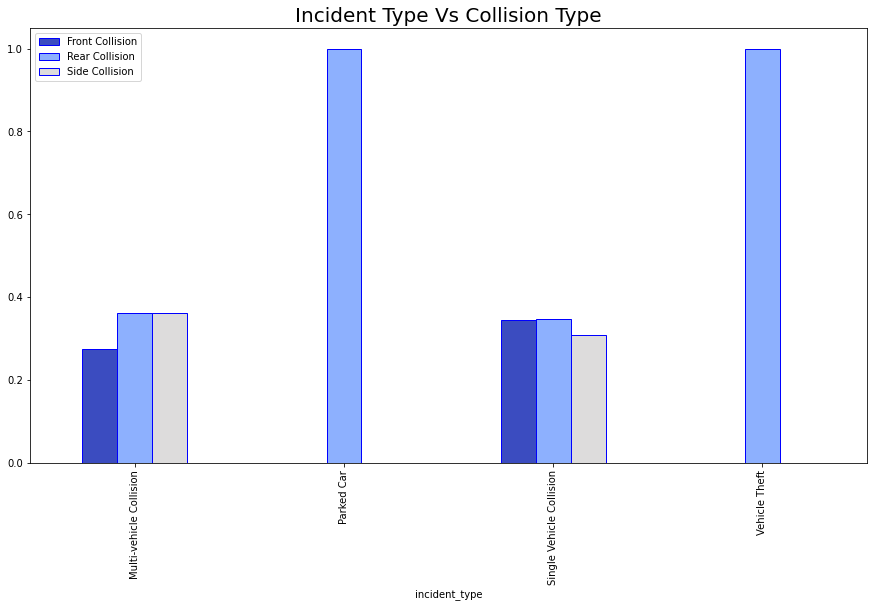

In [32]:
incident = pd.crosstab(data['incident_type'], data['collision_type'])
colors = plt.cm.coolwarm(np.linspace(0,1,5))
incident.div(incident.sum(1).astype(float), 
             axis=0).plot(kind='bar',
                          stacked=False,
                          figsize=(15,8),
                          color=colors, edgecolor='blue'
)

plt.title('Incident Type Vs Collision Type', fontsize=20)
plt.legend()
plt.show()

#### Bivariate Plotting

In [33]:
fig = px.histogram(
    data, 
    x='policy_annual_premium', 
    y='insured_occupation',
    color='insured_sex',
    marginal='rug',
    title='Distribution of Annual Premium by Occupation by Gender'
)

fig.show()

In [34]:
sex = data['insured_sex'].value_counts()
rel = data['insured_relationship'].value_counts()

label_sex = sex.index
size_sex = sex.values

label_rel = rel.index
size_rel = rel.values

colors = ['aqua', 'gold']
trace = go.Pie(
    labels=label_sex, 
    values=size_sex, 
    marker=dict(colors=colors), 
    name='Gender',
     hole=0.3
)

colors2 = ['pink', 'lightblue', 'lightgreen', 'grey', 'red']
trace2 = go.Pie(
    labels=label_rel, 
    values=size_rel, 
    marker=dict(colors=colors2), 
    name='Relationship', 
    hole=0.3
)

df = [trace]
df2 = [trace2]

layout1 = go.Layout(
    title='Gender'
)

layout2 = go.Layout(
    title='Relationship'
)

fig = go.Figure(data=df, layout=layout1)
fig2 = go.Figure(data=df2, layout=layout2)
iplot(fig)
iplot(fig2)

In [35]:
trace = go.Violin(
    x=data['insured_sex'], 
    y=data['insured_zip'], 
    name='Gender Vs Insured Zip',
    opacity=0.75,
    marker=dict(color='rgb(215, 5, 185, 0.5)')
)
          
df = [trace]

layout = go.Layout(
    title='Distribution of Gender Vs Insured Zip',
)

fig = go.Figure(data=df, layout=layout)
iplot(fig)

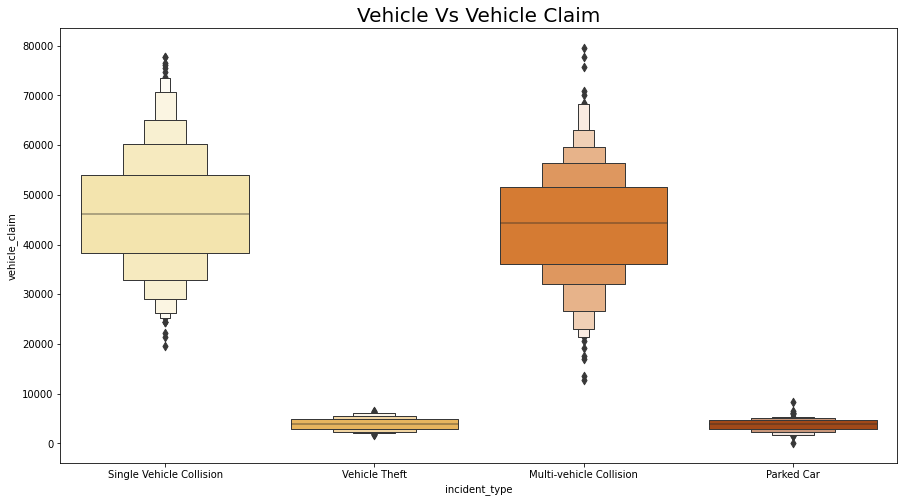

In [36]:
plt.rcParams['figure.figsize'] = (15,8)

sns.boxenplot(data['incident_type'], data['vehicle_claim'], palette='YlOrBr')
plt.title('Vehicle Vs Vehicle Claim', fontsize=20)
plt.show()

In [37]:
trace = go.Box(
    x=data['auto_make'],
    y=data['vehicle_claim'],
    opacity=0.9,
    marker=dict(color='orchid')
)

df = [trace]

layout = go.Layout(
    title='Distribution of Vehicle Claim by Vehicle Brand' 
)

fig = go.Figure(data=df, layout=layout)
iplot(fig)

In [38]:
trace = go.Violin(
    x=data['incident_type'],
    y=data['auto_make'],
    name='Incident caused by vehicle',
    opacity=0.9,
    marker=dict(color='mediumaquamarine'),marker_line_width=1.5
)
          
df = [trace]

layout = go.Layout(
    title='Distribution of Vehicle Incident by Vehicle Brand',
)

fig = go.Figure(data=df, layout=layout)
iplot(fig)

In [39]:
trace = go.Box(
    x=data['incident_state'], 
    y=data['injury_claim'], 
    opacity=0.9,
    marker=dict(color='orchid')
)

df = [trace]

layout = go.Layout(
    title='Distribution of Injury Claim by State'
)

fig = go.Figure(data=df, layout=layout)
iplot(fig)

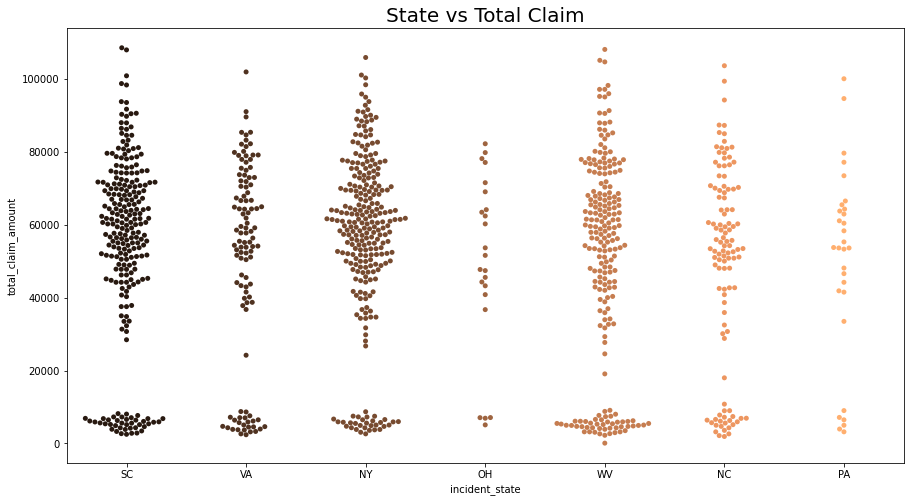

In [40]:
plt.rcParams['figure.figsize'] = (15,8)

sns.swarmplot(data['incident_state'], data['total_claim_amount'], palette='copper')
plt.title('State vs Total Claim', fontsize=20)
plt.show()

#### Multivariate Plotting

In [41]:
trace = go.Scatter3d(
    x=data['age'], 
    y=data['injury_claim'],
    z=data['vehicle_claim'],
    mode='markers',
    marker=dict(size=10, color=data['age'])
)
    
df = [trace]

layout = go.Layout(
    title='Injury Claim Vs Vehicle Claim by Age',
    margin=dict(l=0, r=0, b=0, t=0),
    scene = dict(xaxis=dict(title='Age'),
                 yaxis=dict(title='Injury Claim'),
                 zaxis=dict(title='Vehicle Claim'))    
)

fig = go.Figure(data=df, layout=layout)
iplot(fig)

In [42]:
trace = go.Scatter3d(
    x=data['total_claim_amount'], 
    y=data['injury_claim'], 
    z=data['vehicle_claim'], 
    mode='markers',
    marker=dict(size=10, color=data['total_claim_amount'])
)
    
df = [trace]

layout = go.Layout(
    title='Injury Claim Vs Vehicle Claim by Total Claim',
    margin=dict(l=0, r=0, b=0, t=0),
    scene = dict(xaxis=dict(title='Total Claim'),
                 yaxis=dict(title='Injury Claim'),
                 zaxis=dict(title='Vehicle Claim'))    
)

fig = go.Figure(data=df, layout=layout)
iplot(fig)

In [43]:
figure = bubbleplot(
    dataset=data, 
    x_column='policy_annual_premium', 
    y_column='total_claim_amount', 
    bubble_column='insured_sex', 
    time_column='auto_year', 
    size_column='years_as_customer', 
    color_column='insured_sex', 
    x_title='Annual Premium', 
    y_title='Total Claim', 
    title='Annual Premium by Total Claim by Gender',
    x_logscale=False, 
    scale_bubble=3, 
    height=650
)

iplot(figure, config={'scrollzoom': True})

## Data preparation

In [44]:
# Extract days, month and year from 'policy_bind_date'
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'], errors='coerce')

In [45]:
# Perform encoding of 'fraud_reported' to numeric values
data['fraud_reported'] = data['fraud_reported'].replace(('Y', 'N'),
                                                        (0, 1))

# Preview classes of 'fraud_reported"
#data['fraud_reported'].value_counts()

In [46]:
# Preview the correlation of 'auto_make' with target
data[['auto_make', 'fraud_reported']].groupby(['auto_make'], 
                                             as_index=False).mean().sort_values(by='fraud_reported', ascending=False)

,auto_make,fraud_reported
7,Jeep,0.835821
9,Nissan,0.820513
12,Toyota,0.814286
0,Accura,0.808824
10,Saab,0.775000
11,Suburu,0.762500
4,Dodge,0.750000
6,Honda,0.745455
3,Chevrolet,0.723684
2,BMW,0.722222


In [47]:
# Perform target encoding for 'auto_make'
data['auto_make'] = data['auto_make'].replace(('Jeep', 'Nissan', 'Toyota', 'Accura',
                                               'Saab', 'Suburu', 'Dodge', 'Honda', 'Chevrolet',
                                               'BMW', 'Volkswagen', 'Audi', 'Ford', 'Mercedes'),
                                              (0.84, 0.82, 0.81, 0.80, 0.77, 0.76, 0.75, 0.74, 0.73,
                                               0.72, 0.71, 0.69, 0.69, 0.66))

# Preview the values
#data['auto_make'].value_counts()

In [48]:
# Preview the correlation of 'police_report_available' with target
data[['police_report_available', 'fraud_reported']].groupby(['police_report_available'], 
                                                           as_index=False).mean().sort_values(by='fraud_reported', ascending=False)

,police_report_available,fraud_reported
1,YES,0.770701
0,NO,0.744898


In [49]:
# Perform target encoding for 'police_report_available'
data['police_report_available'] = data['police_report_available'].replace(('NO', 'YES'),
                                                                          (0.77, 0.74))

# Preview the values
#data['police_report_available'].value_counts()

In [50]:
# Preview the correlation of 'property_damage' with target
data[['property_damage', 'fraud_reported']].groupby(['property_damage'], 
                                                   as_index=False).mean().sort_values(by='fraud_reported', ascending=False)

,property_damage,fraud_reported
0,NO,0.757880
1,YES,0.741722


In [51]:
# Perform target encoding for 'property_damage'
data['property_damage'] = data['property_damage'].replace(('NO', 'YES'),
                                                          (0.76, 0.74))

# Preview the values
#data['property_damage'].value_counts()

In [52]:
# Preview the correlation of 'incident_city' with target
data[['incident_city', 'fraud_reported']].groupby(['incident_city'], 
                                                 as_index=False).mean().sort_values(by='fraud_reported', ascending=False)

,incident_city,fraud_reported
4,Northbrook,0.778689
5,Riverwood,0.776119
3,Northbend,0.765517
6,Springfield,0.757962
2,Hillsdale,0.751773
1,Columbus,0.738255
0,Arlington,0.710526


In [53]:
# Perform target encoding for 'incident_city'
data['incident_city'] = data['incident_city'].replace(('Northbrook', 'Riverwood', 'Northbend',
                                                       'Springfield', 'Hillsdale', 'Columbus',
                                                       'Arlington'),
                                                      (0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.71))

# Preview the values
#data['incident_city'].value_counts()

In [54]:
# Preview the correlation of 'authorities_contacted' with target
data[['incident_state', 'fraud_reported']].groupby(['incident_state'], 
                                                  as_index=False).mean().sort_values(by='fraud_reported', ascending=False)

,incident_state,fraud_reported
6,WV,0.820276
1,NY,0.778626
5,VA,0.772727
3,PA,0.733333
4,SC,0.705645
0,NC,0.690909
2,OH,0.565217


In [55]:
# Perform target encoding for 'incident_state'
data['incident_state'] = data['incident_state'].replace(('WV', 'NY', 'VA', 'PA', 'SC',
                                                         'NC', 'OH'),
                                                        (0.82, 0.77, 0.76, 0.73, 0.70,
                                                         0.69, 0.56))

# Preview the values
#data['incident_state'].value_counts()

In [56]:
# Preview the correlation of 'authorities_contacted' with target
data[['authorities_contacted', 'fraud_reported']].groupby(['authorities_contacted'], 
                                                         as_index=False).mean().sort_values(by='fraud_reported', ascending=False)

,authorities_contacted,fraud_reported
2,None,0.934066
4,Police,0.791096
1,Fire,0.730942
0,Ambulance,0.709184
3,Other,0.681818


In [57]:
# Perform target encoding for 'authorities_contacted'
data['authorities_contacted'] = data['authorities_contacted'].replace(('None', 'Police', 'Fire',
                                                                       'Ambulance', 'Other'),
                                                                      (0.94, 0.79, 0.73, 0.70, 0.68))

# Preview the values
#data['authorities_contacted'].value_counts()

In [58]:
# Preview the correlation of 'incident_severity' with target
data[['incident_severity', 'fraud_reported']].groupby(['incident_severity'], 
                                                     as_index=False).mean().sort_values(by='fraud_reported', ascending=False)

,incident_severity,fraud_reported
3,Trivial Damage,0.933333
1,Minor Damage,0.892655
2,Total Loss,0.871429
0,Major Damage,0.394928


In [59]:
# Perform target encoding for 'incident_severity'
data['incident_severity'] = data['incident_severity'].replace(('Trivial Damage', 'Minor Damage',
                                                               'Total Loss', 'Major Damage'),
                                                              (0.94, 0.89, 0.87, 0.39))

# Preview the values
#data['incident_severity'].value_counts()

In [60]:
# Preview the correlation of 'collision_type' with target
data[['collision_type', 'fraud_reported']].groupby(['collision_type'], 
                                                  as_index=False).mean().sort_values(by='fraud_reported', ascending=False)

,collision_type,fraud_reported
1,Rear Collision,0.772340
2,Side Collision,0.746377
0,Front Collision,0.724409


In [61]:
# Perform target encoding for 'collision_type'
data['collision_type'] = data['collision_type'].replace(('Rear Collision', 'Side Collision', 
                                                         'Front Collision'),
                                                        (0.78, 0.74, 0.72))

# Preview the values
#data['collision_type'].value_counts()

In [62]:
# Preview the correlation of 'incident_type' with target
data[['incident_type', 'fraud_reported']].groupby(['incident_type'], 
                                                 as_index=False).mean().sort_values(by ='fraud_reported', ascending=False)

,incident_type,fraud_reported
3,Vehicle Theft,0.914894
1,Parked Car,0.904762
0,Multi-vehicle Collision,0.727924
2,Single Vehicle Collision,0.709677


In [63]:
# Perform target encoing for 'incident_type'
data['incident_type'] = data['incident_type'].replace(('Vehicle Theft', 'Parked Car',
                                                       'Multi-vehicle Collision',
                                                       'Single Vehicle Collision'),
                                                      (0.91, 0.90, 0.72, 0.70))

# Preview the values
#data['incident_type'].value_counts()

In [64]:
data['incident_date'] = pd.to_datetime(data['incident_date'], errors='coerce')

# Extracting days and month from date
data['incident_month'] = data['incident_date'].dt.month
data['incident_day'] = data['incident_date'].dt.day

In [65]:
# Preview the correlation of 'insured_relationship' with target
data[['insured_relationship', 'fraud_reported']].groupby(['insured_relationship'], 
                                                        as_index=False).mean().sort_values(by='fraud_reported', ascending=False)

,insured_relationship,fraud_reported
0,husband,0.794118
3,own-child,0.786885
4,unmarried,0.758865
1,not-in-family,0.741379
5,wife,0.729032
2,other-relative,0.706215


In [66]:
# Perform target encoding for 'insured_relationship'
data['insured_relationship'] = data['insured_relationship'].replace(('husband', 'own-child', 'unmarried',
                                                                     'not-in-family', 'wife', 'other-relative'),
                                                                    (0.79, 0.78, 0.75, 0.74, 0.72, 0.70))
# Preview the values
#data['insured_relationship'].value_counts()

In [67]:
# Preview the correlation of 'insured_hobbies' with target
data[['insured_hobbies', 'fraud_reported']].groupby(['insured_hobbies'], 
                                                   as_index=False).mean().sort_values(by='fraud_reported', ascending=False)

,insured_hobbies,fraud_reported
4,camping,0.909091
11,kayaking,0.907407
9,golf,0.890909
7,dancing,0.883721
3,bungie-jumping,0.839286
12,movies,0.836364
1,basketball,0.823529
8,exercise,0.807018
17,sleeping,0.804878
18,video-games,0.800000


In [68]:
# Perform target encoding for 'insured_hobbies'
data['insured_hobbies'] = data['insured_hobbies'].replace(('camping', 'kayaking', 'golf', 'dancing',
                                                           'bungie-jumping', 'movies', 'basketball',
                                                           'exercise', 'sleeping', 'video-games',
                                                           'skydiving','paintball', 'hiking', 'base-jumping',
                                                           'reading', 'polo', 'board-games', 'yachting', 
                                                           'cross-fit', 'chess'),
                                                          (0.91, 0.90, 0.89, 0.88, 0.84, 0.83, 0.82,
                                                           0.81, 0.805, 0.80, 0.78, 0.77, 0.76, 0.73,
                                                           0.73, 0.72, 0.70, 0.69, 0.25, 0.17))
# Preview the values
#data['insured_hobbies'].value_counts()

In [69]:
# Preview the correlation of 'insured_occupation' with target
data[['insured_occupation', 'fraud_reported']].groupby(['insured_occupation'], 
                                                      as_index=False).mean().sort_values(by='fraud_reported', ascending=False)

,insured_occupation,fraud_reported
7,other-service,0.830986
8,priv-house-serv,0.830986
0,adm-clerical,0.830769
5,handlers-cleaners,0.796296
9,prof-specialty,0.788235
10,protective-serv,0.777778
6,machine-op-inspct,0.763441
1,armed-forces,0.753623
11,sales,0.723684
12,tech-support,0.717949


In [70]:
# Perform target encoding for 'insured_occupation'
data['insured_occupation'] = data['insured_occupation'].replace(('other-service', 'priv-house-serv', 'adm-clerical',
                                                                 'handlers-cleaners', 'prof-specialty', 'protective-serv',
                                                                 'machine-op-inspct','armed-forces', 'sales', 'tech-support',
                                                                 'transport-moving', 'craft-repair', 'farming-fishing', 'exec-managerial'),
                                                                (0.84, 0.84, 0.83, 0.79, 0.78, 0.77, 0.76, 0.75, 0.72, 
                                                                 0.71, 0.705, 0.70, 0.69, 0.63))
# Preview the values
#data['insured_occupation'].value_counts()

In [71]:
# Preview the correlation of 'insured_education_level' with target
data[['insured_education_level', 'fraud_reported']].groupby(['insured_education_level'], 
                                                            as_index=False).mean().sort_values(by='fraud_reported', ascending=False)

,insured_education_level,fraud_reported
5,Masters,0.776224
2,High School,0.775000
0,Associate,0.765517
3,JD,0.739130
1,College,0.737705
4,MD,0.736111
6,PhD,0.736000


In [72]:
# Perform target encoding for 'insured_education_level'
data['insured_education_level'] = data['insured_education_level'].replace(('Masters', 'High School', 'Associate',
                                                                           'JD', 'College', 'MD', 'PhD'),
                                                                          (0.78, 0.77, 0.76, 0.74, 0.73, 0.72, 0.71))
# Preview the values
#data['insured_education_level'].value_counts()

In [73]:
# Preview the correlation of 'insured_sex' with target
data[['insured_sex', 'fraud_reported']].groupby(['insured_sex'], 
                                               as_index=False).mean().sort_values(by='fraud_reported', ascending=False)

,insured_sex,fraud_reported
0,FEMALE,0.765363
1,MALE,0.738661


In [74]:
# Perform target encoding for 'insured_sex'
data['insured_sex'] = data['insured_sex'].replace(('FEMALE','MALE'),
                                                  (0.76, 0.73))

# Preview the values
#data['insured_sex'].value_counts()

In [75]:
# CSL - Combined Single Limit
'''
  CSL is a single number that describes the predetermined limit for the 
  combined total of the Bodily Injury Liability coverage and 
  Property Damage Liability coverage per occurrence or accident
'''
# Preview the relation of 'policy_csl' with target
data[['policy_csl', 'fraud_reported']].groupby(['policy_csl'], 
                                              as_index=False).mean().sort_values(by='fraud_reported', ascending=False)

,policy_csl,fraud_reported
2,500/1000,0.783333
0,100/300,0.742120
1,250/500,0.737892


In [76]:
# Perform target encoding for 'policy_csl'
data['policy_csl'] = data['policy_csl'].replace(('500/1000', '100/300', '250/500'),
                                                (0.78, 0.74, 0.73))

# Preview the values
#data['policy_csl'].value_counts()

In [77]:
# Drop unnecessary variables
to_drop = ['months_as_customer', 'policy_number', 'policy_bind_date', 
           'policy_state', 'incident_date', 'incident_location', 'auto_model']
data.drop(to_drop, axis=1, inplace=True)